In [1]:
import sys
sys.path.append('/Users/oandrews/PycharmProjects/ops_bootstrapping/')

In [4]:
import bs.test

In [5]:
dir(test)

NameError: name 'test' is not defined

In [9]:
test.__path__

['/Users/oandrews/mambaforge/envs/ops-env/lib/python3.9/test']

In [6]:
sys.path

['/Users/oandrews/PycharmProjects/ops_bootstrapping/snakemake',
 '/Users/oandrews/mambaforge/envs/ops-env/lib/python39.zip',
 '/Users/oandrews/mambaforge/envs/ops-env/lib/python3.9',
 '/Users/oandrews/mambaforge/envs/ops-env/lib/python3.9/lib-dynload',
 '',
 '/Users/oandrews/mambaforge/envs/ops-env/lib/python3.9/site-packages',
 '/Users/oandrews/PycharmProjects/OpticalPooledScreens',
 '/Users/oandrews/PycharmProjects/ops_bootstrapping/bs/',
 '/Users/oandrews/PycharmProjects/ops_bootstrapping/bs/']

In [3]:
import pandas as pd
#from bs.test import compute_variate

In [2]:
file = '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcanos_all_guides/secondary_untreated/combined.trans.std.csv'

In [3]:
df = pd.read_csv(file)

In [11]:
target_features = ['dapi_fus_corr_cell','fus_median_cytoplasm']
df.groupby(['gene_symbol','cell_barcode_0']).sample(20,replace=True).groupby(['gene_symbol','cell_barcode_0'])[target_features].median().reset_index()

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,fus_median_cytoplasm
0,ABHD16A,ACCATGTTT,0.273395,-0.081799
1,ABHD16A,ATCTACGCC,0.093277,0.032516
2,ABHD16A,CCATCTTGG,-0.050112,-0.139342
3,ABHD16A,CTCAGGAAG,-0.167656,-0.242554
4,ADGRA3,ATCTGAACT,-0.472537,-0.045405
...,...,...,...,...
841,nontargeting,AAATACAAG,0.131140,0.074812
842,nontargeting,AAATGCACA,-0.432596,-0.335664
843,nontargeting,AAATTGGCT,-0.159255,-0.347952
844,nontargeting,AACAGGAAA,-0.084358,-0.043981


In [12]:
df.groupby(['gene_symbol','cell_barcode_0'])[target_features].median().reset_index()

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,fus_median_cytoplasm
0,ABHD16A,ACCATGTTT,-0.003027,-0.268519
1,ABHD16A,ATCTACGCC,0.042534,-0.059388
2,ABHD16A,CCATCTTGG,-0.092801,-0.281715
3,ABHD16A,CTCAGGAAG,-0.137623,-0.257529
4,ADGRA3,ATCTGAACT,0.118794,0.045694
...,...,...,...,...
841,nontargeting,AAATACAAG,-0.130834,-0.141658
842,nontargeting,AAATGCACA,-0.077866,-0.058540
843,nontargeting,AAATTGGCT,-0.413435,-0.310481
844,nontargeting,AACAGGAAA,-0.053516,-0.084512


In [25]:
target_features = ['dapi_fus_corr_cell','fus_median_cytoplasm']
df_boot = pd.concat([df.groupby(['gene_symbol','cell_barcode_0']).sample(20,replace=True).groupby(['gene_symbol','cell_barcode_0'])[target_features].median().reset_index() for _ in range(10)
],axis=0).set_index(['gene_symbol','cell_barcode_0']).reset_index()

In [26]:
df_boot

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,fus_median_cytoplasm
0,ABHD16A,ACCATGTTT,0.074190,-0.213637
1,ABHD16A,ATCTACGCC,0.087067,-0.341504
2,ABHD16A,CCATCTTGG,-0.725853,-0.071272
3,ABHD16A,CTCAGGAAG,-0.272378,-0.511559
4,ADGRA3,ATCTGAACT,-0.127684,-0.005432
...,...,...,...,...
8455,nontargeting,AAATACAAG,-0.266060,-0.024803
8456,nontargeting,AAATGCACA,-0.099928,0.023787
8457,nontargeting,AAATTGGCT,-0.405058,-0.276660
8458,nontargeting,AACAGGAAA,-0.227225,0.101913


In [21]:
df_boot = pd.concat([df.groupby(['gene_symbol','cell_barcode_0']).sample(20,replace=True).groupby(['gene_symbol','cell_barcode_0'])[target_features].median().reset_index() for _ in range(10)
],axis=1).transpose()

In [24]:
pd.concat([df[target_features]
                                    .sample(n=20,replace=True).median() 
                                    for _ in range(10)]
                                    ,axis=1).transpose()

,dapi_fus_corr_cell,fus_median_cytoplasm
0,0.129250,-0.150480
1,-0.516269,-0.488485
2,0.006341,-0.280864
3,0.272566,-0.104685
4,-0.246449,-0.283986
5,-0.315046,-0.198965
6,0.144686,-0.549222
7,-0.276979,-0.202682
8,0.444539,-0.007373
9,0.180607,-0.241224


In [43]:
def compute_variate(df,variate='median',target_features=None,n_samples=None,sample_depth=None,index_features=['gene_symbol','cell_barcode_0'],min_count=None,group_feature=None,wildcards=None):
    '''
    Modes:
    Normal
    Bootstrapping
    Subsampling
    n_samples = None => Normal Mode
    n_samples not None and n_depth = None => Bootstrap at full representation
    n_samples and n_depth not None => Subsample with replacement for variate.

    Note: for the null samples, it will generate N_guides x n_samples total samples. Can reduce n_bootstrap from 1E5 to 1E5/N_guides
    '''

    if target_features is None:
        target_features = [col for col in df.columns if col not in index_features]

    if variate=='median':
        if n_samples is None: #Normal-mode
            df_out = df.groupby(index_features)[target_features].median()
            if 'population_count' in df.columns:
                df_out['population_count']=df.groupby(index_features)['population_count'].sum()
            else:
                df_out['population_count']=df.groupby(index_features).apply(lambda x: len(x))
            if min_count is not None:
                df_out = df_out.query('population_count >= @min_count')
            return df_out.reset_index()
        
        else:
            if sample_depth is not None:
                df_out = pd.concat([df.groupby(index_features).sample(sample_depth,replace=True)
                                    .groupby(index_features)[target_features].median()
                                    .reset_index() for _ in range(n_samples)
                                    ],axis=0).assign(population_count=sample_depth)
                return df_out
            else:
                raise(NotImplementedError('Bootstrapping without subsampling is not yet implemented'))

            
                
    if variate=='auc':
        #The tricky part here is that I need to compute and pass in a value for the null auc. Where to do this?
        raise NotImplementedError('Have not implemented deltaAUC as a variate yet.')

In [54]:
compute_variate(df.query('gene_symbol=="nontargeting"'),target_features=target_features,n_samples=5000,sample_depth=1000)

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,fus_median_cytoplasm,population_count
0,nontargeting,AAAACAGGA,-0.163434,-0.063575,1000
1,nontargeting,AAAACATCG,-0.136978,0.132732,1000
2,nontargeting,AAAATAGCA,0.139323,0.069373,1000
3,nontargeting,AAAATCGAT,-0.084666,-0.017405,1000
4,nontargeting,AAAATTATC,-0.005068,-0.063265,1000
...,...,...,...,...,...
15,nontargeting,AAATACAAG,-0.094596,-0.087879,1000
16,nontargeting,AAATGCACA,0.006430,-0.063265,1000
17,nontargeting,AAATTGGCT,-0.413435,-0.330670,1000
18,nontargeting,AACAGGAAA,-0.046514,-0.067883,1000


In [6]:
def _split_null(df,control_feature='gene_symbol',control_value='nontargeting'):
    return df.query(control_feature+'==@control_value')

In [2]:
from bs.snakemake_wrapper import snakeify as sfy

In [9]:
import pandas as pd

In [3]:
input_file = '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_240416/secondary_arsenite/combined.trans.std.csv'
output_file = '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_240416/secondary_arsenite/null.trans.std.csv'

In [10]:
sfy(_split_null)(df=pd.read_csv(input_file),output=[output_file])

In [9]:
import inspect

In [70]:
import bs.bootstrapping

In [74]:
dict(inspect.getmembers(bs.bootstrapping, inspect.isfunction))

{'basic_file_format': <function bs.bootstrapping.basic_file_format(suffix, directory='process', temp_tags=())>,
 'composite_population_file_format': <function bs.bootstrapping.composite_population_file_format(suffix, directory='process', temp_tags=())>,
 'drop_df_duplicates': <function bs.bootstrapping.drop_df_duplicates(input_file, output_file, drop_subsets=[['plate', 'well', 'tile', 'cell_0'], ['plate', 'well', 'site', 'cell_1']])>,
 'get_count_list': <function bs.bootstrapping.get_count_list(df, feature)>,
 'get_gene_guide_depths': <function bs.bootstrapping.get_gene_guide_depths(df, gene_feature='gene_symbol', guide_feature='cell_barcode_0', mode='volcano', DropDuplicates=False, drop_subsets=[['plate', 'well', 'tile', 'cell_0'], ['plate', 'well', 'site', 'cell_1']])>,
 'get_guide_depths': <function bs.bootstrapping.get_guide_depths()>,
 'get_target_file_strings': <function bs.bootstrapping.get_target_file_strings(df, population_features=['gene_symbol', 'cell_barcode_0'], mode='volc

In [75]:
dir(bs.bootstrapping)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'basic_file_format',
 'choices',
 'composite_population_file_format',
 'drop_df_duplicates',
 'get_count_list',
 'get_gene_guide_depths',
 'get_guide_depths',
 'get_target_file_strings',
 'np',
 'null_composite_file_format',
 'null_depth_file_format',
 'partial',
 'pd',
 'population_basic_file_format',
 'population_depth_file_format',
 're',
 'sample',
 'split_composite_file',
 'split_composite_wildcards',
 'trim_count_list']

In [78]:
bs.bootstrapping.__file__

'/Users/oandrews/PycharmProjects/ops_bootstrapping/snakemake/../bs/bootstrapping.py'

In [6]:
def get_module_functions(module):
    name_func_tuples = inspect.getmembers(module, inspect.isfunction)
    name_func_tuples = [t for t in name_func_tuples if inspect.getmodule(t[1]) == module]
    return dict(name_func_tuples)

In [7]:
get_module_functions(bs.bootstrapping)

AttributeError: module 'bs' has no attribute 'bootstrapping'

In [11]:
import bs
import bs.test
fn_dict = get_module_functions(bs.test)

In [12]:
for x in fn_dict:
    print(x)

_testerer
compute_variate


In [14]:
type(bs.test)

module

In [15]:
bs.test._testerer

<function bs.test._testerer()>

In [17]:
bs.test.testerer = bs.test._testerer

In [25]:
bs.test['testerer']

TypeError: 'module' object is not subscriptable

In [4]:
input_file = '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/combined.trans.std.csv'
df = pd.read_csv(input_file)

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,screen,plate,well,tile,cell_0,cell_barcode_0,gene_symbol,cell_barcode_count_0,cell_barcode_count_1,area_cell,area_nucleus,dapi_median_nucleus,fus_median_cell,fus_median_nucleus,fus_median_cytoplasm,dapi_fus_corr_cell
0,8170730,8170730,secut,1,A1,147,30,CAGCAGGAA,CALCOCO2,2,0.0,0.302450,-0.067033,-0.954209,-0.367355,-0.507627,-0.364008,-0.300128
1,8170731,8170731,secut,1,A1,198,112,CAGCAGGAA,CALCOCO2,12,2.0,1.437660,2.716261,-1.719553,-0.302856,-1.656982,-0.299173,-1.837604
2,8170732,8170732,secut,1,A1,271,98,CAGCAGGAA,CALCOCO2,3,1.0,0.378241,0.591829,0.115271,-0.981480,-0.139763,-0.981339,1.615603
3,8170733,8170733,secut,1,A1,1072,7,CAGCAGGAA,CALCOCO2,3,0.0,0.950196,0.857974,-0.101003,-0.320307,0.291725,-0.316715,-2.354279
4,8170734,8170734,secut,1,A1,146,16,CAGCAGGAA,CALCOCO2,6,1.0,0.666585,0.841888,0.029208,0.077462,0.118518,0.083131,0.413041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369625,8540355,8540355,secut,1,B2,1114,19,TCGGCGAGC,MCRIP2,2,1.0,2.053052,1.075387,-0.324807,-1.140518,-1.136979,-1.145250,-0.832871
369626,8540356,8540356,secut,1,B2,631,27,TCGGCGAGC,MCRIP2,15,14.0,1.261291,0.797497,0.025665,-1.076300,-0.712768,-1.080638,-0.019349
369627,8540357,8540357,secut,1,B2,344,99,TCGGCGAGC,MCRIP2,9,7.0,0.617637,0.217916,-1.287372,-0.483932,-1.242795,-0.484637,-1.282395
369628,8540358,8540358,secut,1,B3,182,17,TCGGCGAGC,MCRIP2,17,9.0,2.756307,3.119190,-0.394509,-0.722492,-1.116117,-0.721050,-0.669013


In [6]:
import bs.bootstrapping as strap

In [7]:
strap.compute_variate(df,target_features=['dapi_fus_corr_cell','dapi_median_nucleus'])

ValueError: Expected a 1D array, got an array with shape (846, 3)

In [10]:
target_features=['dapi_fus_corr_cell','dapi_median_nucleus']
index_features = ['gene_symbol','cell_barcode_0']
df_out = df.groupby(index_features)[target_features].median().reset_index()
df_out

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,dapi_median_nucleus
0,ABHD16A,ACCATGTTT,-0.003027,-0.274649
1,ABHD16A,ATCTACGCC,0.042534,-0.000339
2,ABHD16A,CCATCTTGG,-0.092801,-0.221055
3,ABHD16A,CTCAGGAAG,-0.137623,-0.271119
4,ADGRA3,ATCTGAACT,0.118794,0.101073
...,...,...,...,...
841,nontargeting,AAATACAAG,-0.130834,0.012640
842,nontargeting,AAATGCACA,-0.077866,-0.058585
843,nontargeting,AAATTGGCT,-0.413435,-0.243881
844,nontargeting,AACAGGAAA,-0.053516,-0.118210


In [12]:
df.groupby(index_features).apply(lambda x: len(x))

gene_symbol   cell_barcode_0
ABHD16A       ACCATGTTT          200
              ATCTACGCC          920
              CCATCTTGG          214
              CTCAGGAAG          384
ADGRA3        ATCTGAACT         1775
                                ... 
nontargeting  AAATACAAG          149
              AAATGCACA          785
              AAATTGGCT          321
              AACAGGAAA          412
              AACATCTCG          874
Length: 846, dtype: int64

In [15]:
def compute_variate(df,variate='median',target_features=None,
                    index_features=['gene_symbol','cell_barcode_0'],
                    n_samples=None,sample_depth=None,
                    min_count=None,group_feature=None,wildcards=None):
    '''

    n_samples: Number of times to sample variate per index_feature group. If index_feature group contains sgRNA barcodes,
    e.g., for null model sampling, it will create n_samples PER GUIDE. YOU DON"T NEED TO DO 100k samples!

    n_depth: Number of cells to sample for variate computation.
    min_count: determines the minimum number of cells per index_group. If a group has fewer cells, it is dropped from the data-frame.  
    default=None 

    Modes:
    Normal
    Bootstrapping
    Subsampling
    n_samples = None => Normal Mode
    n_samples not None and n_depth = None => Bootstrap at full representation
    n_samples and n_depth not None => Subsample with replacement for variate.

    Note: for the null samples, it will generate N_guides x n_samples total samples. Can reduce n_bootstrap from 1E5 to 1E5/N_guides
    '''

    if target_features is None:
        target_features = [col for col in df.columns if col not in index_features]

    if variate=='median':
        if n_samples is None: #Normal-mode
            df_out = df.groupby(index_features)[target_features].median().reset_index()
            if 'population_count' in df.columns:
                df_out['population_count']=df.groupby(index_features)['population_count'].sum().reset_index().drop(columns=index_features)
            else:
                df_out['population_count']=df.groupby(index_features).apply(lambda x: len(x)).reset_index().drop(columns=index_features)
            if min_count is not None:
                df_out = df_out.query('population_count >= @min_count')
            return df_out
        
        else: #Bootstrapping mode
            if sample_depth is not None: 
                df_out = pd.concat([df.groupby(index_features).sample(sample_depth,replace=True)
                                    .groupby(index_features)[target_features].median()
                                    .reset_index() for _ in range(n_samples)
                                    ],axis=0).assign(population_count=sample_depth)
                return df_out
            else:
                raise(NotImplementedError('Bootstrapping without subsampling is not yet implemented'))

    if variate=='auc':
        #The tricky part here is that I need to compute and pass in a value for the null auc. Where to do this?
        raise NotImplementedError('Have not implemented deltaAUC as a variate yet.')

In [16]:
compute_variate(df,target_features=['dapi_fus_corr_cell','dapi_median_nucleus'])

,gene_symbol,cell_barcode_0,dapi_fus_corr_cell,dapi_median_nucleus,population_count
0,ABHD16A,ACCATGTTT,-0.003027,-0.274649,200
1,ABHD16A,ATCTACGCC,0.042534,-0.000339,920
2,ABHD16A,CCATCTTGG,-0.092801,-0.221055,214
3,ABHD16A,CTCAGGAAG,-0.137623,-0.271119,384
4,ADGRA3,ATCTGAACT,0.118794,0.101073,1775
...,...,...,...,...,...
841,nontargeting,AAATACAAG,-0.130834,0.012640,149
842,nontargeting,AAATGCACA,-0.077866,-0.058585,785
843,nontargeting,AAATTGGCT,-0.413435,-0.243881,321
844,nontargeting,AACAGGAAA,-0.053516,-0.118210,412


In [18]:
file = '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/combined.group_var.csv'
strap.split_by_population(pd.read_csv(file),population_values=['FUS','TNPO1'],population_feature='gene_symbol')

[   gene_symbol  area_cell  area_nucleus  dapi_fus_corr_cell  \
 61         FUS   0.125099      0.046008           -1.033741   
 
     dapi_median_nucleus  fus_median_nucleus  fus_median_cytoplasm  \
 61            -0.331216           -2.504581             -1.993607   
 
     fus_median_cell  population_count  
 61        -1.976598              2180  ,
     gene_symbol  area_cell  area_nucleus  dapi_fus_corr_cell  \
 183       TNPO1   0.194364      0.221175           -0.421999   
 
      dapi_median_nucleus  fus_median_nucleus  fus_median_cytoplasm  \
 183            -0.256515            -0.43647             -0.017963   
 
      fus_median_cell  population_count  
 183        -0.022485              1978  ]

In [ ]:
population_feature=['gene_symbol']
pd.read_csv(file).query(population_feature+'==@population') 

In [ ]:
rule bootstrap_null_composite_variates:
    input:
        partial(split_composite_file,suffix='var.boot.csv')#split_output(composite_population_file('group_var.boot.csv')) #Implement this split function
    output:
        temp(null_composite_file('group_var.boot.csv'))
    run:
        sfy(strap.evaluate_composite_variate)(
            output=output,
            df_list=input,
            wildcards=wildcards
        )

In [ ]:
'/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/'

In [19]:
files = ['/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/null-N500.var.boot.csv', 
         '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/null-N400.var.boot.csv', 
         '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/null-N300.var.boot.csv', 
         '/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/null-N200.var.boot.csv']
df_list = [pd.read_csv(file) for file in files]

In [21]:
strap.evaluate_composite_variate(df_list)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [22]:
df_list[0]

,gene_symbol,cell_barcode_0,area_cell,area_nucleus,dapi_fus_corr_cell,dapi_median_nucleus,fus_median_nucleus,fus_median_cytoplasm,fus_median_cell,population_count
0,nontargeting,AAAACAGGA,-0.045016,-0.121890,-0.180568,0.025993,-0.047790,-0.063575,-0.066323,500
1,nontargeting,AAAACATCG,0.079471,0.056193,-0.035366,0.237265,-0.062110,0.065702,0.070711,500
2,nontargeting,AAAATAGCA,0.044979,0.131346,0.157306,0.129393,0.105823,0.119800,0.112819,500
3,nontargeting,AAAATCGAT,0.103728,0.101275,-0.105735,0.082973,-0.033434,-0.020440,-0.018888,500
4,nontargeting,AAAATTATC,-0.045543,-0.030436,-0.077608,-0.116473,-0.221237,-0.094146,-0.096267,500
...,...,...,...,...,...,...,...,...,...,...
19995,nontargeting,AAATACAAG,-0.050279,-0.054522,-0.130834,0.012640,-0.062031,-0.101489,-0.098266,500
19996,nontargeting,AAATGCACA,0.124816,0.035790,-0.070336,-0.051637,-0.103646,-0.059415,-0.063206,500
19997,nontargeting,AAATTGGCT,0.133863,0.023915,-0.355804,-0.324807,-0.739045,-0.326627,-0.318450,500
19998,nontargeting,AACAGGAAA,0.213383,-0.033033,-0.114130,-0.233702,-0.193521,-0.142923,-0.145860,500


In [24]:
import numpy as np

In [27]:
pd.DataFrame(np.median([df.drop(columns=['gene_symbol','cell_barcode_0']).values for df in df_list],axis=0))

,0,1,2,3,4,5,6,7
0,-0.051274,-0.147552,-0.180568,-0.026711,-0.066600,-0.094800,-0.098599,350.0
1,0.076946,0.091346,-0.132383,0.259332,-0.009744,0.123221,0.120292,350.0
2,0.054260,0.123702,0.151359,0.110168,0.072137,0.012742,0.008658,350.0
3,0.108709,0.083820,-0.069125,0.042578,-0.074166,-0.068157,-0.068336,350.0
4,-0.044063,-0.012971,-0.075503,-0.012726,-0.173680,-0.044841,-0.048433,350.0
...,...,...,...,...,...,...,...,...
19995,-0.065887,-0.104974,-0.063051,0.024358,-0.024251,-0.113670,-0.102377,350.0
19996,0.121260,0.031069,-0.064869,-0.043880,-0.155471,-0.138713,-0.142674,350.0
19997,0.114541,-0.006867,-0.398008,-0.180916,-0.630366,-0.292477,-0.282379,350.0
19998,0.109210,0.008566,-0.088643,-0.109403,-0.152175,-0.111380,-0.114123,350.0


In [29]:
np.shape([df.drop(columns=['gene_symbol','cell_barcode_0']).values for df in df_list])

(4, 20000, 8)

In [36]:
[df.drop(columns=[]).values for df in df_list]

[array([['nontargeting', 'AAAACAGGA', -0.045015552275866, ...,
         -0.0635745403960247, -0.0663231623263516, 500],
        ['nontargeting', 'AAAACATCG', 0.0794711577128087, ...,
         0.0657024004095213, 0.0707112796226179, 500],
        ['nontargeting', 'AAAATAGCA', 0.0449785160974283, ...,
         0.1198004707976236, 0.1128191115546548, 500],
        ...,
        ['nontargeting', 'AAATTGGCT', 0.1338631719126037, ...,
         -0.3266274727695718, -0.318449884942618, 500],
        ['nontargeting', 'AACAGGAAA', 0.2133831401283508, ...,
         -0.1429231340446854, -0.1458595461452793, 500],
        ['nontargeting', 'AACATCTCG', 0.0096435544379282, ...,
         -0.043393128805429, -0.0457644544920031, 500]], dtype=object),
 array([['nontargeting', 'AAAACAGGA', -0.0575333573186515, ...,
         -0.0872931916534155, -0.092374434042864, 400],
        ['nontargeting', 'AAAACATCG', 0.0744213108321744, ...,
         0.1614955683355491, 0.1554195431401788, 400],
        ['nontarget

In [37]:
df_boot = pd.read_csv('/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/null_N500+400+300+200.group_var.boot.csv')

In [38]:
df_boot

,area_cell,area_nucleus,dapi_fus_corr_cell,dapi_median_nucleus,fus_median_nucleus,fus_median_cytoplasm,fus_median_cell,population_count,population
0,-0.035967,-0.129449,-0.171816,-0.018245,-0.170142,-0.122162,-0.124613,500+400+300+200,NaN
1,0.067475,0.029912,-0.114537,0.229771,-0.023207,0.128152,0.127912,500+400+300+200,NaN
2,0.049951,0.149902,0.151876,0.133723,0.095271,0.078865,0.073520,500+400+300+200,NaN
3,0.103175,0.053661,-0.068822,0.028049,-0.053154,-0.046048,-0.048032,500+400+300+200,NaN
4,-0.036830,-0.039848,-0.095830,-0.004370,-0.197461,-0.092207,-0.095385,500+400+300+200,NaN
...,...,...,...,...,...,...,...,...,...
19995,-0.050071,-0.054226,-0.109515,-0.009800,-0.086001,-0.146465,-0.141410,500+400+300+200,NaN
19996,0.079481,0.007577,-0.114707,-0.058241,-0.108677,-0.038554,-0.042250,500+400+300+200,NaN
19997,0.132097,0.003763,-0.390322,-0.240072,-0.632771,-0.286581,-0.288712,500+400+300+200,NaN
19998,0.118257,0.051804,-0.046913,-0.159448,-0.115352,-0.128739,-0.131757,500+400+300+200,NaN


In [39]:
df_effect = pd.read_csv('/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/TNPO1.group_var.csv')

In [40]:
df_effect

,gene_symbol,area_cell,area_nucleus,dapi_fus_corr_cell,dapi_median_nucleus,fus_median_nucleus,fus_median_cytoplasm,fus_median_cell,population_count
0,TNPO1,0.194364,0.221175,-0.421999,-0.256515,-0.43647,-0.017963,-0.022485,1978


In [46]:
df_combined = pd.read_csv('/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/input/combined.trans.std.csv',usecols=['gene_symbol','cell_barcode_0'])

In [49]:
df_combined.drop_duplicates(subset='gene_symbol')

,cell_barcode_0,gene_symbol
0,CAGCAGGAA,CALCOCO2
233,AGAACATTC,PRKG2
748,GCTAATATC,NME5
1510,TTGCTGAAC,MED20
2234,ATGCCTAAG,OR52A1
...,...,...
295568,AGAACCGAG,EDC4
304848,GACAGTCCA,PIP5K1A
307832,AGCGCGCGT,PDK1
316646,GTTGTAACA,TTC9


In [56]:
df_volcano = pd.read_csv('/Users/oandrews/ResearchData/ALS/Secondary_Screen/FUS_095/volcano_test_240429/process/output/volcano.genes.csv')

In [58]:
df_volcano

,gene_symbol,area_cell,area_nucleus,dapi_fus_corr_cell,dapi_median_nucleus,fus_median_nucleus,fus_median_cytoplasm,fus_median_cell,population_count,p_area_cell,p_area_nucleus,p_dapi_fus_corr_cell,p_dapi_median_nucleus,p_fus_median_nucleus,p_fus_median_cytoplasm,p_fus_median_cell,population
0,RETREG3,0.112051,0.047058,-0.174929,-0.304606,-0.252983,-0.238388,-0.241195,1471,0.441,0.765,0.379,0.113,0.389,0.225,0.225,RETREG3
1,AGO4,0.122146,0.067295,-0.150418,-0.241311,-0.246986,-0.196247,-0.192618,1138,0.385,0.642,0.540,0.153,0.398,0.298,0.312,AGO4
2,TAF6L,0.170381,0.095796,0.216111,-0.324565,0.027610,-0.232614,-0.230364,1705,0.085,0.399,0.100,0.105,0.386,0.228,0.234,TAF6L
3,IRAK2,0.027485,-0.071125,-0.040243,-0.159406,-0.085466,-0.098208,-0.092302,2893,0.793,0.302,0.512,0.232,0.989,0.591,0.649,IRAK2
4,JSRP1,0.326175,0.080822,-0.284361,-0.377395,-0.293989,-0.242906,-0.243285,1188,0.000,0.553,0.227,0.099,0.306,0.228,0.230,JSRP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,ZC3H18,0.147357,0.194378,-0.099332,-0.169420,-0.075067,-0.059911,-0.063954,2250,0.150,0.033,0.894,0.216,0.916,0.931,0.917,ZC3H18
203,PRKCZ,0.133562,0.001314,-0.180519,-0.236648,-0.279284,-0.199296,-0.200440,2170,0.318,0.892,0.360,0.145,0.344,0.290,0.292,PRKCZ
204,HLCS,0.054685,0.030009,0.129932,-0.083855,-0.013859,-0.059214,-0.061083,3935,0.967,0.893,0.255,0.472,0.527,0.947,0.955,HLCS
205,PHKG2,0.113693,0.068979,-0.209337,-0.222024,-0.350426,-0.265080,-0.265923,885,0.446,0.625,0.334,0.166,0.232,0.201,0.199,PHKG2


In [60]:
import matplotlib.pyplot as plt

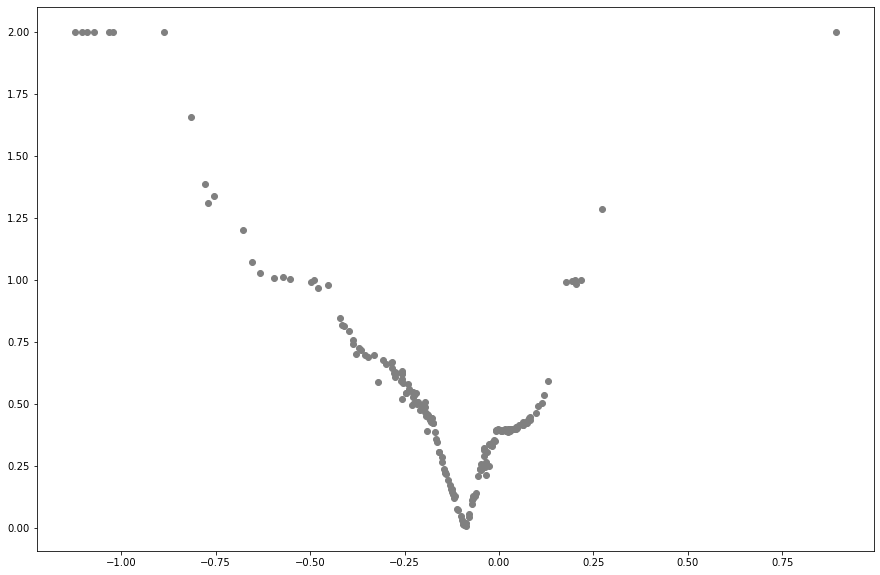

In [67]:
target_feature = 'dapi_fus_corr_cell'
target_screen = 'secondary_untreated'
clipping = 1E-2


figure = plt.figure(figsize=(15,10))
plt.scatter(df_volcano[target_feature],-np.log(df_volcano['p_'+target_feature].clip(clipping))/np.log(10),color='gray')

In [68]:
len(df_volcano)

207

In [69]:
-np.log(0.05)/np.log(10)

1.301029995663981